In [5]:
import numpy as np
import pandas as pd 
from numpy import random
pd.set_option('display.max_columns', None)

In [6]:
from glob import glob
np.random.seed(12345)
# Path to the CSV files
path = 'Stacked_*.csv'
# Use glob to match the pattern and get a list of file names
files = glob(path)
# Read each CSV file and store them in a list
dfs = [pd.read_csv(file) for file in files]
# Concatenate all DataFrames in the list into one
df = pd.concat(dfs, ignore_index=True)

MemoryError: Unable to allocate 128. KiB for an array with shape (16384,) and data type int64

In [ ]:
df.head()

In [ ]:
df = df.drop(['CURRENT ACTUAL UPB'],axis=1)

In [ ]:
df = df.dropna(subset=["% Change in UPB"])
df['% Change in UPB'] = df['% Change in UPB'] * 100
df = df[(df['CREDIT SCORE'] != 9999)]
df = df[(df['ORIGINAL DEBT-TO-INCOME (DTI) RATIO'] != 999)]
df = df[df['NUMBER OF BORROWERS'] != 99]

In [ ]:
df = df.drop(['Unnamed: 0','_c0'],axis=1)
df.rename(columns={'index_sa': 'HPI'}, inplace=True)
df.dtypes

In [ ]:
df.shape

In [7]:
df.head()

NameError: name 'df' is not defined

In [8]:
import pandas as pd
import plotly.graph_objects as go


# Calculate totals
total_defaults = df['DEFAULT'].sum()
total_non_defaults = df['DEFAULT'].count() - total_defaults

# Calculate percentages
total_count = df['DEFAULT'].count()
percentage_defaults = (total_defaults / total_count) * 100
percentage_non_defaults = (total_non_defaults / total_count) * 100

# Print the results
print(f'Total Defaults (1): {total_defaults}')
print(f'Total Non-Defaults (0): {total_non_defaults}')
print(f'Percentage Defaults (1): {percentage_defaults:.2f}%')
print(f'Percentage Non-Defaults (0): {percentage_non_defaults:.2f}%')

# Create bar graph
categories = ['Defaults', 'Non-Defaults']
counts = [total_defaults, total_non_defaults]
percentages = [percentage_defaults, percentage_non_defaults]

fig = go.Figure(data=[
    go.Bar(name='Count', x=categories, y=counts, text=counts, textposition='auto'),
    #go.Bar(name='Percentage', x=categories, y=percentages, text=[f'{percentage_defaults:.2f}%', f'{percentage_non_defaults:.2f}%'], textposition='auto')
])

# Change the bar mode
fig.update_layout(barmode='group', title='Defaults vs Non-Defaults Loans of Single Family', yaxis_title='Count')

fig.show()


NameError: name 'df' is not defined

In [128]:
df = df.sort_values(by='OrigDate', ascending=True)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [129]:
df['ESTIMATED LOAN TO VALUE (ELTV)'] = pd.to_numeric(df['ESTIMATED LOAN TO VALUE (ELTV)'], errors='coerce').fillna(-1)
contains_undefined = df['ESTIMATED LOAN TO VALUE (ELTV)'].isin(['undefined']).any()
print("Is 'undefined' present in the ELTV column?", contains_undefined)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

Is 'undefined' present in the ELTV column? False


In [130]:
df = df.drop(['OrigDate', 'AMORTIZATION TYPE', 'PROPERTY TYPE'],axis=1)
#df.head()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [131]:
df = df.drop(['Source', 'LOAN AGE', 'ORIGINAL LOAN TERM','LOAN SEQUENCE NUMBER','PROPERTY STATE', 'Group', 'OrigQuarter'],axis=1)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [132]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)  
encoded_values = ordinal_encoder.fit_transform(df[['MONTHLY REPORTING PERIOD']])
df['MONTHLY REPORTING PERIOD'] = encoded_values.astype(int)
encoded_value = ordinal_encoder.fit_transform(df[['OrigYear']])
df['OrigYear'] = encoded_values.astype(int)
#df = df.drop(['OrigDate'], axis = 1)
#encoded_values_o = ordinal_encoder.fit_transform(df[['OrigDate']])
#df['OrigDate'] = encoded_values_o.astype(int)
#df.head()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [133]:
df['CURRENT LOAN DELINQUENCY STATUS'] = df['CURRENT LOAN DELINQUENCY STATUS'].replace({'RA': 45})

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [134]:
df.columns

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

Index(['DEFAULT', 'Horizon', 'Calendar Time',
       'CURRENT LOAN DELINQUENCY STATUS', 'CURRENT INTEREST RATE',
       'ESTIMATED LOAN TO VALUE (ELTV)', 'CREDIT SCORE',
       'FIRST TIME HOMEBUYER FLAG', 'NUMBER OF UNITS', 'OCCUPANCY STATUS',
       'ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)',
       'ORIGINAL DEBT-TO-INCOME (DTI) RATIO', 'ORIGINAL LOAN-TO-VALUE (LTV)',
       'CHANNEL', 'LOAN PURPOSE', 'NUMBER OF BORROWERS', 'OrigYear', 'HPI',
       'UNRATE', 'inflation', '% Change in UPB', 'Calendar Time.1', 'HPI.1',
       'MONTHLY REPORTING PERIOD', 'HPI'],
      dtype='object')

In [135]:
print(df.isnull().any())

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

DEFAULT                                   False
Horizon                                   False
Calendar Time                              True
CURRENT LOAN DELINQUENCY STATUS           False
CURRENT INTEREST RATE                     False
ESTIMATED LOAN TO VALUE (ELTV)            False
CREDIT SCORE                              False
FIRST TIME HOMEBUYER FLAG                 False
NUMBER OF UNITS                           False
OCCUPANCY STATUS                          False
ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)    False
ORIGINAL DEBT-TO-INCOME (DTI) RATIO       False
ORIGINAL LOAN-TO-VALUE (LTV)              False
CHANNEL                                   False
LOAN PURPOSE                              False
NUMBER OF BORROWERS                       False
OrigYear                                  False
HPI                                        True
UNRATE                                    False
inflation                                 False
% Change in UPB                         

In [136]:
#from sklearn.preprocessing import KBinsDiscretizer
# Define the discretizer
#uniform_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
# Select columns for discretization and transform
#uniform_bins = uniform_discretizer.fit_transform(df[['CREDIT SCORE', 'ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)', 'ORIGINAL DEBT-TO-INCOME (DTI) RATIO', 'CURRENT INTEREST RATE', 'ESTIMATED LOAN TO VALUE (ELTV)','% Change in UPB', 'CURRENT LOAN DELINQUENCY STATUS', 'ORIGINAL LOAN-TO-VALUE (LTV)', 'HPI', 'UNRATE', 'inflation']])
# Assign new bin columns to DataFrame
#uniform_bins = uniform_bins.astype(int)
#df[['Credit Score', 'CLTV', 'DTI', 'CURRENT INTEREST RATE_', 'ELTV', '% change in UPB', 'CURRENT LOAN DELINQUENCY STATUS_', 'LTV', 'HPI_', 'UNRATE_', 'inflation_']] = uniform_bins


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [137]:
#df = df.drop(['CREDIT SCORE', 'ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)', 'ORIGINAL DEBT-TO-INCOME (DTI) RATIO', 'CURRENT INTEREST RATE', 'ESTIMATED LOAN TO VALUE (ELTV)', '% Change in UPB', 'CURRENT LOAN DELINQUENCY STATUS', 'ORIGINAL LOAN-TO-VALUE (LTV)', 'HPI', 'UNRATE', 'inflation'], axis=1)
#df.head()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [138]:
df.columns

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

Index(['DEFAULT', 'Horizon', 'Calendar Time',
       'CURRENT LOAN DELINQUENCY STATUS', 'CURRENT INTEREST RATE',
       'ESTIMATED LOAN TO VALUE (ELTV)', 'CREDIT SCORE',
       'FIRST TIME HOMEBUYER FLAG', 'NUMBER OF UNITS', 'OCCUPANCY STATUS',
       'ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)',
       'ORIGINAL DEBT-TO-INCOME (DTI) RATIO', 'ORIGINAL LOAN-TO-VALUE (LTV)',
       'CHANNEL', 'LOAN PURPOSE', 'NUMBER OF BORROWERS', 'OrigYear', 'HPI',
       'UNRATE', 'inflation', '% Change in UPB', 'Calendar Time.1', 'HPI.1',
       'MONTHLY REPORTING PERIOD', 'HPI'],
      dtype='object')

In [139]:
#print(df.isnull().any())

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [141]:
df.rename(columns={'MONTHLY REPORTING PERIOD': 'Calendar Time'}, inplace=True)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [142]:
#print(df.isnull().any())

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [143]:
df.shape

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

(10548190, 25)

In [144]:
df.dtypes

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

DEFAULT                                     int64
Horizon                                     int64
Calendar Time                              object
CURRENT LOAN DELINQUENCY STATUS            object
CURRENT INTEREST RATE                     float64
ESTIMATED LOAN TO VALUE (ELTV)            float64
CREDIT SCORE                                int64
FIRST TIME HOMEBUYER FLAG                  object
NUMBER OF UNITS                             int64
OCCUPANCY STATUS                           object
ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)      int64
ORIGINAL DEBT-TO-INCOME (DTI) RATIO         int64
ORIGINAL LOAN-TO-VALUE (LTV)                int64
CHANNEL                                    object
LOAN PURPOSE                               object
NUMBER OF BORROWERS                         int64
OrigYear                                    int32
HPI                                       float64
UNRATE                                    float64
inflation                                 float64


In [145]:
df.shape

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

(10548190, 25)

In [146]:
dfc = df.copy()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [147]:
from sklearn.preprocessing import OneHotEncoder

# Assuming df is your DataFrame
columns_to_encode = ['FIRST TIME HOMEBUYER FLAG', 'OCCUPANCY STATUS', 'CHANNEL', 'LOAN PURPOSE']

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', dtype=int)

# Fit and transform the data
encoded_columns = encoder.fit_transform(dfc[columns_to_encode])

# Convert the sparse matrix to a dense array and then to integers
encoded_columns_dense = encoded_columns.toarray().astype(int)

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_columns_dense, columns=encoder.get_feature_names_out(columns_to_encode))

# Reset index of the original DataFrame
dfc.reset_index(drop=True, inplace=True)

# Ensure the encoded DataFrame has the same index as the original DataFrame
encoded_df.index = dfc.index

# Concatenate the encoded columns with the original DataFrame
dfc = pd.concat([dfc, encoded_df], axis=1)

# Drop the original columns
dfc.drop(columns=columns_to_encode, inplace=True)

# Display the head of the DataFrame
dfc.head()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,DEFAULT,Horizon,Calendar Time,CURRENT LOAN DELINQUENCY STATUS,CURRENT INTEREST RATE,ESTIMATED LOAN TO VALUE (ELTV),CREDIT SCORE,NUMBER OF UNITS,ORIGINAL COMBINED LOAN-TO-VALUE (CLTV),ORIGINAL DEBT-TO-INCOME (DTI) RATIO,ORIGINAL LOAN-TO-VALUE (LTV),NUMBER OF BORROWERS,OrigYear,HPI,UNRATE,inflation,% Change in UPB,Calendar Time.1,HPI.1,Calendar Time,HPI,FIRST TIME HOMEBUYER FLAG_N,FIRST TIME HOMEBUYER FLAG_Y,OCCUPANCY STATUS_I,OCCUPANCY STATUS_P,OCCUPANCY STATUS_S,CHANNEL_B,CHANNEL_C,CHANNEL_R,CHANNEL_T,LOAN PURPOSE_C,LOAN PURPOSE_N,LOAN PURPOSE_P
0,0,0,2002-03,0,6.875,-1.0000,773,1,80,22,80,2,-2147483648,157.51,5.7,1.5,0.00,NaN,NaN,-2147483648,NaN,1,0,0,1,0,0,0,0,1,0,0,1
1,0,7,NaN,0,6.750,0.6779,622,1,42,24,42,2,48,NaN,4.8,3.6,-4.75,NaN,NaN,48,219.89,1,0,0,1,0,0,0,1,0,0,1,0
2,0,8,NaN,0,6.750,0.6800,622,1,42,24,42,2,47,NaN,4.7,4.0,-4.64,NaN,NaN,47,219.47,1,0,0,1,0,0,0,1,0,0,1,0
3,0,9,NaN,1,6.750,0.6851,622,1,42,24,42,2,46,NaN,4.9,3.4,-4.53,NaN,NaN,46,218.09,1,0,0,1,0,0,0,1,0,0,1,0
4,0,10,NaN,0,6.750,0.6892,622,1,42,24,42,2,45,NaN,5.0,3.5,-4.53,NaN,NaN,45,216.79,1,0,0,1,0,0,0,1,0,0,1,0


In [148]:
#For 24 months
dev_24 = dfc[dfc['Calendar Time'] <= 231]
oot_24 = dfc[dfc['Calendar Time'] > 231] 

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

TypeError: '<=' not supported between instances of 'str' and 'int'

In [ ]:
#For 36 months
dev_36 = dfc[dfc['Calendar Time'] <= 220]
oot_36 = dfc[dfc['Calendar Time'] > 220]

In [ ]:
#For 12 months
dev_12 = dfc[dfc['Calendar Time'] <= 244]
oot_12 = dfc[dfc['Calendar Time'] > 244]

In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
total_rows = len(df)
end_test_idx = total_rows
print(total_rows)
split_index = int(end_test_idx * 0.8)
# Print the calculated split index
print(f"Training data ends at index: {split_index}")
print(f"Testing data starts at index: {split_index + 1} and ends at index: {end_test_idx}")
train = df[:split_index]
y = train['DEFAULT']
arr = compute_class_weight(class_weight="balanced", classes=np.unique(y), y=y)
value1, value2 = arr
print(f"Testing data starts at index: {value1} and ends at index: {value2}")

In [ ]:
df['Weight'] = df['DEFAULT'].apply(lambda x: value1 if x == 0 else value2).astype(np.float32)

In [ ]:
df.dtypes

In [ ]:
#actual_by_horizon = oot.groupby('Horizon')['DEFAULT'].mean().sort_index()
#print(actual_by_horizon)

In [ ]:
actual_by_cal = df.groupby('Calendar Time')['DEFAULT'].mean().sort_index()
print(actual_by_cal)

In [ ]:
import plotly.graph_objects as go


# Create a line plot with Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=actual_by_cal.index,
    y=actual_by_cal,
    mode='lines+markers',
    name='Default Rate',
    line=dict(color='blue'),
    marker=dict(color='blue')
))

# Customize the layout
fig.update_layout(
    title='Actual Default Rate Over Calendar Month',
    xaxis_title='Calendar Month',
    yaxis_title='Default Rate',
    xaxis=dict(tickangle=-45),
    template='plotly_white'
)

# Show the plot
fig.show()


In [ ]:
from piml import Experiment
exp = Experiment()
exp.data_loader(data = df, silent=True)

In [40]:
exp.data_summary(feature_exclude=[], feature_type={"Horizon":"categorical", "Weight":"numerical"})

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,name,n_missing,mean,std,min,q1,median,q3,max
0,Calendar Time,0,144.8276,63.5233,0.0000,92.0000,150.0000,200.0000,256.0000
1,CURRENT LOAN DELINQUENCY STATUS,0,1.3114,5.2494,0.0000,0.0000,0.0000,0.0000,104.0000
2,CURRENT INTEREST RATE,0,5.1405,1.1719,2.0000,4.2500,5.0000,6.0000,8.8750
3,ESTIMATED LOAN TO VALUE (ELTV),0,0.8179,0.2951,-1.0000,0.7406,0.8668,0.9728,1.6913
4,CREDIT SCORE,0,718.2430,56.6343,300.0000,677.0000,721.0000,765.0000,829.0000
5,ORIGINAL COMBINED LOAN-TO-VALUE (CLTV),0,76.5969,14.8917,12.0000,69.0000,80.0000,89.0000,102.0000
6,ORIGINAL DEBT-TO-INCOME (DTI) RATIO,0,36.2283,10.5743,2.0000,29.0000,37.0000,44.0000,65.0000
7,ORIGINAL LOAN-TO-VALUE (LTV),0,75.8713,14.9495,12.0000,69.0000,80.0000,86.0000,100.0000
8,OrigYear,0,144.8276,63.5233,0.0000,92.0000,150.0000,200.0000,256.0000
9,HPI,0,234.3643,53.2835,156.5100,193.0000,219.9100,260.3100,404.5700


Data Shape:(5274055, 22)


In [41]:
custom_train_idx = np.arange(0, split_index)
custom_test_idx = np.arange(split_index+1, end_test_idx)
exp.data_prepare(target='DEFAULT', task_type='classification', sample_weight="Weight", train_idx=custom_train_idx, test_idx=custom_test_idx, random_state = 1234)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,Config,Value
0,Excluded columns,[]
1,Target variable,DEFAULT
2,Sample weight,Weight
3,Task type,classification
4,Split method,manual
5,Test ratio,0.2
6,Random state,1234


In [42]:
from piml.models import XGB2Classifier
exp.model_train(XGB2Classifier(n_estimators=1000, max_depth=1),'XGB1')
#exp.model_train(XGB2Classifier(n_estimators=1000, reg_alpha = 0.0, reg_lambda = 0.5, eta = 0.3, max_depth=1),'XGB1')
exp.model_diagnose(model="XGB1", show="accuracy_table"), 

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,ACC,AUC,F1,LogLoss,Brier
,,,,,
Train,0.8503,0.9303,0.8444,0.3490,0.1063
Test,0.7867,0.8610,0.7884,0.4987,0.1563
Gap,-0.0636,-0.0693,-0.0560,0.1497,0.0500


(None,)

In [43]:
df.columns

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

Index(['DEFAULT', 'Horizon', 'Calendar Time',
       'CURRENT LOAN DELINQUENCY STATUS', 'CURRENT INTEREST RATE',
       'ESTIMATED LOAN TO VALUE (ELTV)', 'CREDIT SCORE',
       'FIRST TIME HOMEBUYER FLAG', 'NUMBER OF UNITS', 'OCCUPANCY STATUS',
       'ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)',
       'ORIGINAL DEBT-TO-INCOME (DTI) RATIO', 'ORIGINAL LOAN-TO-VALUE (LTV)',
       'CHANNEL', 'LOAN PURPOSE', 'NUMBER OF BORROWERS', 'OrigYear', 'HPI',
       'UNRATE', 'inflation', '% Change in UPB', 'Weight'],
      dtype='object')

In [44]:
from piml.models import XGB2Classifier
exp.model_train(model=XGB2Classifier(n_estimators=1000, max_depth=1, mono_increasing_list=('CURRENT INTEREST RATE', 'ORIGINAL LOAN-TO-VALUE (LTV)', 
                                                                                           'UNRATE', 'inflation', 'ESTIMATED LOAN TO VALUE (ELTV)',
                                                                                           'CURRENT LOAN DELINQUENCY STATUS', 'ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)',
                                                                                           'Horizon', '% Change in UPB', 'ORIGINAL DEBT-TO-INCOME (DTI) RATIO'), 
                                     mono_decreasing_list=('CREDIT SCORE','HPI')), name="Mono-XGB1")
exp.model_diagnose(model='Mono-XGB1', show='accuracy_table')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,ACC,AUC,F1,LogLoss,Brier
,,,,,
Train,0.8484,0.9270,0.8428,0.3556,0.1084
Test,0.7990,0.8628,0.8057,0.4894,0.1507
Gap,-0.0493,-0.0641,-0.0371,0.1338,0.0423


In [45]:
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [43]:
train_x = dev_24.drop(['DEFAULT'],axis=1)
train_y = dev_24['DEFAULT']
test_y = dfc.drop(['DEFAULT'],axis=1)
model_xgb1 = exp.get_model('XGB1').estimator
model_xgb1_mono = exp.get_model('Mono-XGB1').estimator
#pred_value2 = model_xgb1.predict(dfx)
#dfx['Horizon'] = pd.to_numeric(dfx['Horizon'], errors='coerce')\
# Aggregate the predicted default rates by Horizon
#pred_by_cal = pd.Series(pred_value2, index=dfx.index).groupby(dfx['Calendar Time']).mean().sort_index()
#print(pred_by_cal)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [50]:
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [51]:
df.columns

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

Index(['DEFAULT', 'Horizon', 'Calendar Time',
       'CURRENT LOAN DELINQUENCY STATUS', 'CURRENT INTEREST RATE',
       'ESTIMATED LOAN TO VALUE (ELTV)', 'CREDIT SCORE',
       'FIRST TIME HOMEBUYER FLAG', 'NUMBER OF UNITS', 'OCCUPANCY STATUS',
       'ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)',
       'ORIGINAL DEBT-TO-INCOME (DTI) RATIO', 'ORIGINAL LOAN-TO-VALUE (LTV)',
       'CHANNEL', 'LOAN PURPOSE', 'NUMBER OF BORROWERS', 'OrigYear', 'HPI',
       'UNRATE', 'inflation', '% Change in UPB', 'Weight'],
      dtype='object')

In [53]:
#exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [54]:
#parameters = {'n_estimators': [100, 300, 500, 1000],
              #'eta': [0.1, 0.3, 0.5],
              #'reg_lambda': [0.0, 0.5, 1.0],
              #'reg_alpha': [0.0, 0.5, 1.0]}
#results = exp.model_tune("XGB1", method="grid", parameters=parameters, metric=['LogLoss'], test_ratio=0.2)
#results.data

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [55]:
#param = results.get_params_ranks(rank=1)
#exp.model_train(XGB2Classifier(**param), name="XGB1-HPO-GridSearch")
#exp.model_diagnose("XGB1-HPO-GridSearch", show="accuracy_table")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [46]:
from sklearn.calibration import CalibratedClassifierCV
# Calibrate the model
calibrated_model_xgb1 = CalibratedClassifierCV(base_estimator=model_xgb1_mono, cv=5, method='isotonic')
calibrated_model_xgb1.fit(train_x, train_y)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

CalibratedClassifierCV(base_estimator=XGB2Classifier(feature_names=['Horizon',
                                                                    'Calendar '
                                                                    'Time',
                                                                    'CURRENT '
                                                                    'LOAN '
                                                                    'DELINQUENCY '
                                                                    'STATUS',
                                                                    'CURRENT '
                                                                    'INTEREST '
                                                                    'RATE',
                                                                    'ESTIMATED '
                                                                    'LOAN TO '
                                                                    'VALUE '
                                                                    '(ELTV)',
                                                                    'CREDIT '
                                                                    'SCORE',
                                                                    'FIRST '
                                                                    'TIME '
                                                                    'HOMEBUYER '
                                                                    'FLAG',
                                                                    'NUMBER OF '
                                                                    'UNITS',
                                                                    'OCCUPANCY '
                                                                    'STATUS',
                                                                    'ORIGINAL '
                                                                    'COMBINED '
                                                                    'LOAN-TO-VALUE '
                                                                    '(CLTV)',
                                                                    'ORIGINAL '
                                                                    'DEBT-TO-INCOME '
                                                                    '(...
                                                     mono_decreasing_list=('CREDIT '
                                                                           'SCORE',
                                                                           'HPI'),
                                                     mono_increasing_list=('CURRENT '
                                                                           'INTEREST '
                                                                           'RATE',
                                                                           'ORIGINAL '
                                                                           'LOAN-TO-VALUE '
                                                                           '(LTV)',
                                                                           'UNRATE',
                                                                           'inflation',
                                                                           'ESTIMATED '
                                                                           'LOAN '
                                                                           'TO '
                                                                           'VALUE '
                                                                           '(ELTV)',
                                                                           'CURRENT '
                                                                           'LOAN '
                    

In [48]:
# Predict probabilities on the test data
test_24 = oot_24.drop(['DEFAULT'],axis=1)
probabilities_xgb1_24 = calibrated_model_xgb1.predict_proba(test_24)[:, 1]  # Get probabilities of the positive class

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [49]:
test_24['predicted_probability_xgb1_24'] = probabilities_xgb1_24 
# Group by horizon and calculate mean probabilities
prob_by_xgb1_24 = test_24.groupby('Calendar Time')['predicted_probability_xgb1_24'].mean().sort_index()
#print(prob_by_xgb1_horizon)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [50]:
actual_by_24 = oot_24.groupby('Calendar Time')['DEFAULT'].mean().sort_index()
print(actual_by_24)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

Calendar Time
232    0.144544
233    0.139480
234    0.133119
235    0.128191
236    0.124027
237    0.119088
238    0.116703
239    0.114005
240    0.110044
241    0.108490
242    0.107077
243    0.105127
244    0.104413
245    0.104104
246    0.101907
247    0.101552
248    0.102309
249    0.101793
250    0.102473
251    0.103663
252    0.104716
253    0.107091
254    0.108580
255    0.108719
256    0.106897
Name: DEFAULT, dtype: float64


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

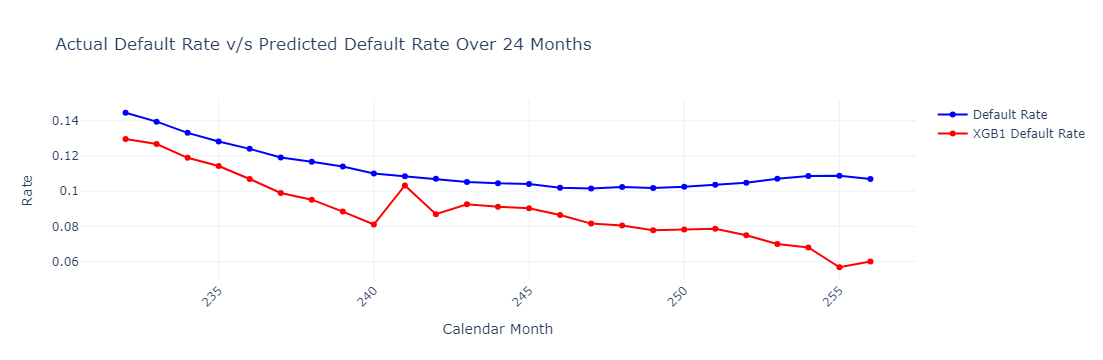

In [51]:
import plotly.graph_objects as go

# Create a line plot with Plotly
fig = go.Figure()

# Add the first trace
fig.add_trace(go.Scatter(
    x=actual_by_24.index,
    y=actual_by_24,
    mode='lines+markers',
    name='Default Rate',
    line=dict(color='blue'),
    marker=dict(color='blue')
))

# Add the second trace for XGB1
fig.add_trace(go.Scatter(
    x=prob_by_xgb1_24.index,
    y=prob_by_xgb1_24,
    mode='lines+markers',
    name='XGB1 Default Rate',
    line=dict(color='red'),
    marker=dict(color='red')
))

# Customize the layout
fig.update_layout(
    title='Actual Default Rate v/s Predicted Default Rate Over 24 Months',
    xaxis_title='Calendar Month',
    yaxis_title='Rate',
    xaxis=dict(tickangle=-45),
    template='plotly_white'
)

# Show the plot
fig.show()

In [52]:
test_36 = oot_36.drop(['DEFAULT'],axis=1)
probabilities_xgb1_36 = calibrated_model_xgb1.predict_proba(test_36)[:, 1]  # Get probabilities of the positive class
test_36['predicted_probability_xgb1_36'] = probabilities_xgb1_36 
# Group by horizon and calculate mean probabilities
prob_by_xgb1_36 = test_36.groupby('Calendar Time')['predicted_probability_xgb1_36'].mean().sort_index()
actual_by_36 = oot_36.groupby('Calendar Time')['DEFAULT'].mean().sort_index()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

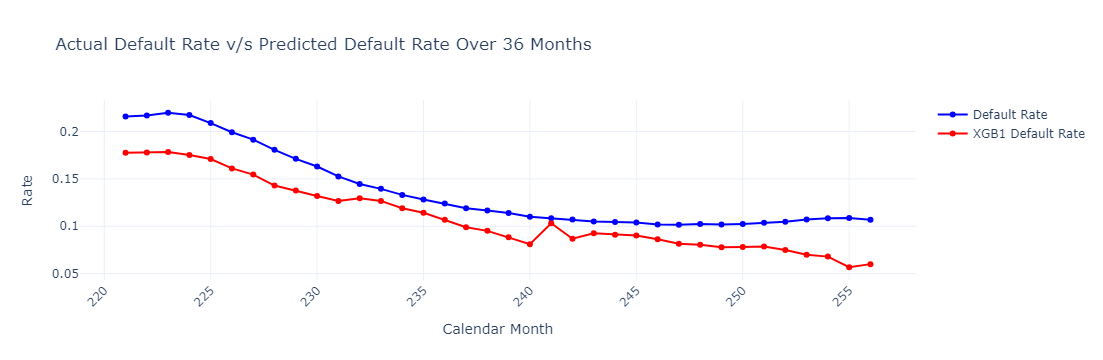

In [53]:
fig = go.Figure()

# Add the first trace
fig.add_trace(go.Scatter(
    x=actual_by_36.index,
    y=actual_by_36,
    mode='lines+markers',
    name='Default Rate',
    line=dict(color='blue'),
    marker=dict(color='blue')
))

# Add the second trace for XGB1
fig.add_trace(go.Scatter(
    x=prob_by_xgb1_36.index,
    y=prob_by_xgb1_36,
    mode='lines+markers',
    name='XGB1 Default Rate',
    line=dict(color='red'),
    marker=dict(color='red')
))

# Customize the layout
fig.update_layout(
    title='Actual Default Rate v/s Predicted Default Rate Over 36 Months',
    xaxis_title='Calendar Month',
    yaxis_title='Rate',
    xaxis=dict(tickangle=-45),
    template='plotly_white'
)

# Show the plot
fig.show()

In [54]:
test_12 = oot_12.drop(['DEFAULT'],axis=1)
probabilities_xgb1_12 = calibrated_model_xgb1.predict_proba(test_12)[:, 1]  # Get probabilities of the positive class
test_12['predicted_probability_xgb1_12'] = probabilities_xgb1_12 
# Group by horizon and calculate mean probabilities
prob_by_xgb1_12 = test_12.groupby('Calendar Time')['predicted_probability_xgb1_12'].mean().sort_index()
actual_by_12 = oot_12.groupby('Calendar Time')['DEFAULT'].mean().sort_index()
print(actual_by_12)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

Calendar Time
245    0.104104
246    0.101907
247    0.101552
248    0.102309
249    0.101793
250    0.102473
251    0.103663
252    0.104716
253    0.107091
254    0.108580
255    0.108719
256    0.106897
Name: DEFAULT, dtype: float64


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

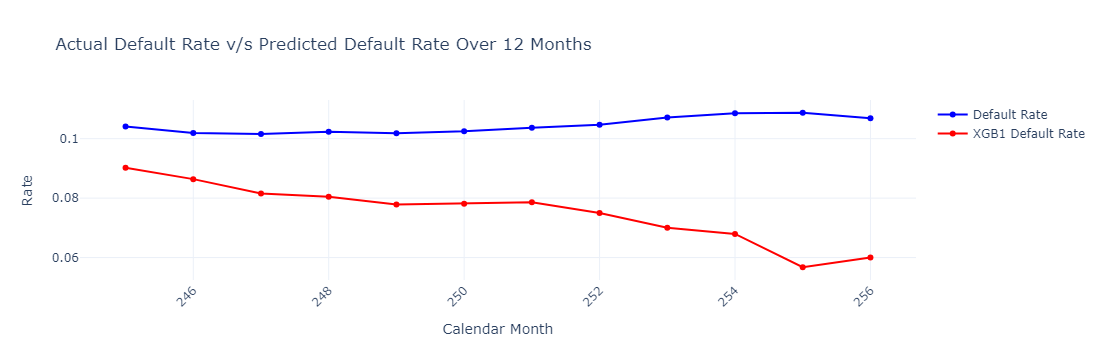

In [55]:
fig = go.Figure()
#plotting
fig.add_trace(go.Scatter(
    x=actual_by_12.index,
    y=actual_by_12,
    mode='lines+markers',
    name='Default Rate',
    line=dict(color='blue'),
    marker=dict(color='blue')
))

# Add the second trace for XGB1
fig.add_trace(go.Scatter(
    x=prob_by_xgb1_12.index,
    y=prob_by_xgb1_12,
    mode='lines+markers',
    name='XGB1 Default Rate',
    line=dict(color='red'),
    marker=dict(color='red')
))

# Customize the layout
fig.update_layout(
    title='Actual Default Rate v/s Predicted Default Rate Over 12 Months',
    xaxis_title='Calendar Month',
    yaxis_title='Rate',
    xaxis=dict(tickangle=-45),
    template='plotly_white'
)

# Show the plot
fig.show()

In [50]:
from piml.models import XGB2Classifier

#exp.model_train(model=XGB2Classifier(mono_increasing_list=('CURRENT INTEREST RATE', 'ORIGINAL LOAN-TO-VALUE (LTV)', 'UNRATE', 'inflation', 'ESTIMATED LOAN TO VALUE (ELTV)','CURRENT LOAN DELINQUENCY STATUS', 'ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)'), mono_decreasing_list=('CREDIT SCORE', 'HPI'), max_depth=2), name="Mono-XGB2")
#exp.model_diagnose(model='Mono-XGB2', show='accuracy_table')
exp.model_train(model=XGB2Classifier(n_estimators=1000, max_depth=2, mono_increasing_list=('CURRENT INTEREST RATE', 'ORIGINAL LOAN-TO-VALUE (LTV)', 
                                                                                           'UNRATE', 'inflation', 'ESTIMATED LOAN TO VALUE (ELTV)',
                                                                                           'CURRENT LOAN DELINQUENCY STATUS', 'ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)',
                                                                                           'Horizon', '% Change in UPB', 'ORIGINAL DEBT-TO-INCOME (DTI) RATIO'), 
                                     mono_decreasing_list=('CREDIT SCORE','HPI')), name="Mono-XGB2")
exp.model_diagnose(model='Mono-XGB2', show='accuracy_table')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,ACC,AUC,F1,LogLoss,Brier
,,,,,
Train,0.8622,0.9400,0.8609,0.3142,0.0975
Test,0.7771,0.8137,0.7836,0.7325,0.1798
Gap,-0.0850,-0.1263,-0.0773,0.4183,0.0823


In [51]:
exp.model_train(model=XGB2Classifier(n_estimators=1000, max_depth=2), name='XGB2')
exp.model_diagnose(model='XGB2', show='accuracy_table')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,ACC,AUC,F1,LogLoss,Brier
,,,,,
Train,0.8929,0.9616,0.8934,0.2544,0.0781
Test,0.7845,0.8771,0.7832,0.5155,0.1567
Gap,-0.1084,-0.0844,-0.1102,0.2611,0.0786


In [52]:
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [43]:
parameters = {'n_estimators': [100, 300, 500, 1000],
              'eta': [0.1, 0.3, 0.5],
              'reg_lambda': [0.0, 0.5, 1.0],
              'reg_alpha': [0.0, 0.5, 1.0]}
result = exp.model_tune("Mono-XGB2", method="grid", parameters=parameters, metric=['LogLoss', 'Brier'], test_ratio=0.2)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [44]:
#result.data

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,Rank(by LogLoss),LogLoss,time
params,,,
"{'eta': 0.5, 'n_estimators': 1000, 'reg_alpha': 0.0, 'reg_lambda': 1.0}",1,0.300190,74.660852
"{'eta': 0.5, 'n_estimators': 1000, 'reg_alpha': 0.0, 'reg_lambda': 0.0}",2,0.300194,56.600327
"{'eta': 0.5, 'n_estimators': 1000, 'reg_alpha': 1.0, 'reg_lambda': 1.0}",3,0.300451,57.847725
"{'eta': 0.5, 'n_estimators': 1000, 'reg_alpha': 1.0, 'reg_lambda': 0.0}",4,0.300469,75.364038
"{'eta': 0.5, 'n_estimators': 1000, 'reg_alpha': 0.5, 'reg_lambda': 1.0}",5,0.300645,57.708565
...,...,...,...
"{'eta': 0.1, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 0.5}",104,0.358149,8.922533
"{'eta': 0.1, 'n_estimators': 100, 'reg_alpha': 1.0, 'reg_lambda': 0.0}",105,0.358149,8.790339
"{'eta': 0.1, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 1.0}",106,0.358150,8.392833


In [45]:
#params = result.get_params_ranks(rank=1)
#exp.model_train(XGB2Classifier(**params), name="XGB2-HPO-GridSearch")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [50]:
#exp.model_diagnose("XGB2-HPO-GridSearch", show="accuracy_table")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,ACC,AUC,F1,LogLoss,Brier
,,,,,
Train,0.8965,0.9634,0.8973,0.2480,0.0758
Test,0.7676,0.8774,0.7538,0.5354,0.1637
Gap,-0.1289,-0.0861,-0.1436,0.2874,0.0878


In [58]:
model_xgb2 = exp.get_model('Mono-XGB2').estimator

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [59]:
from sklearn.calibration import CalibratedClassifierCV
# Calibrate the model
calibrated_model_xgb2 = CalibratedClassifierCV(base_estimator=model_xgb2, cv=5, method='isotonic')
calibrated_model_xgb2.fit(train_x, train_y)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

CalibratedClassifierCV(base_estimator=XGB2Classifier(feature_names=['Horizon',
                                                                    'Calendar '
                                                                    'Time',
                                                                    'CURRENT '
                                                                    'LOAN '
                                                                    'DELINQUENCY '
                                                                    'STATUS',
                                                                    'CURRENT '
                                                                    'INTEREST '
                                                                    'RATE',
                                                                    'ESTIMATED '
                                                                    'LOAN TO '
                                                                    'VALUE '
                                                                    '(ELTV)',
                                                                    'CREDIT '
                                                                    'SCORE',
                                                                    'FIRST '
                                                                    'TIME '
                                                                    'HOMEBUYER '
                                                                    'FLAG',
                                                                    'NUMBER OF '
                                                                    'UNITS',
                                                                    'OCCUPANCY '
                                                                    'STATUS',
                                                                    'ORIGINAL '
                                                                    'COMBINED '
                                                                    'LOAN-TO-VALUE '
                                                                    '(CLTV)',
                                                                    'ORIGINAL '
                                                                    'DEBT-TO-INCOME '
                                                                    '(...
                                                                    'numerical',
                                                                    'numerical',
                                                                    'numerical',
                                                                    'numerical'],
                                                     mono_decreasing_list=('CREDIT '
                                                                           'SCORE',
                                                                           'HPI'),
                                                     mono_increasing_list=('CURRENT '
                                                                           'INTEREST '
                                                                           'RATE',
                                                                           'ORIGINAL '
                                                                           'LOAN-TO-VALUE '
                                                                           '(LTV)',
                                                                           'UNRATE',
                                                                           'inflation',
                                                                           'ESTIMATED '
                                                                           'LOAN '
                                                                           'TO '
                                 

In [60]:
test2_24 = oot_24.drop(['DEFAULT'],axis=1)
probabilities_xgb2_24 = calibrated_model_xgb2.predict_proba(test2_24)[:, 1]  # Get probabilities of the positive class
test2_24['predicted_probability_xgb2_24'] = probabilities_xgb2_24 
# Group by horizon and calculate mean probabilities
prob_by_xgb2_24 = test2_24.groupby('Calendar Time')['predicted_probability_xgb2_24'].mean().sort_index()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

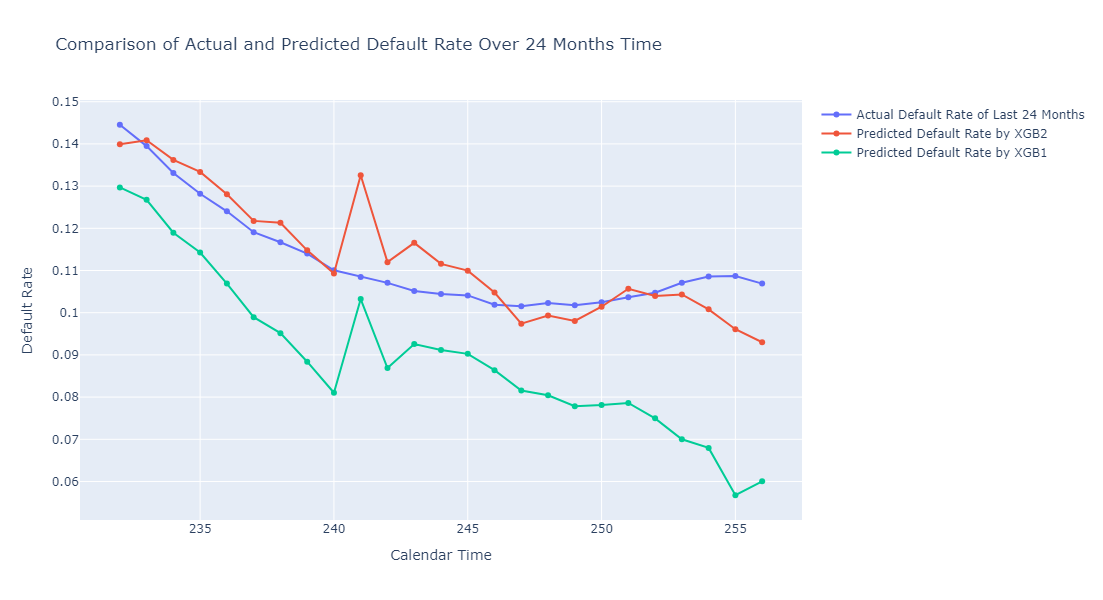

In [61]:
# Create traces
trace_actual = go.Scatter(
    x=actual_by_24.index,
    y=actual_by_24.values,
    mode='lines+markers',
    name='Actual Default Rate of Last 24 Months'
)

#trace_pred_lr = go.Scatter(x=prob_by_horizon_3.index,y=prob_by_horizon_3.values,mode='lines+markers',name='Predicted Default Rate by Logistic Regression')

trace_pred_xgb2 = go.Scatter(
    x=prob_by_xgb2_24.index,
    y=prob_by_xgb2_24.values,
    mode='lines+markers',
    name='Predicted Default Rate by XGB2'
)

trace_pred_xgb1 = go.Scatter(
    x=prob_by_xgb1_24.index,
    y=prob_by_xgb1_24.values,
    mode='lines+markers',
    name='Predicted Default Rate by XGB1'
)

# Create layout
layout = go.Layout(
    title='Comparison of Actual and Predicted Default Rate Over 24 Months Time ',
    xaxis=dict(title='Calendar Time'),
    yaxis=dict(title='Default Rate'),
    hovermode='closest',
    width=800,  # Set the width of the plot
    height=600   # Set the height of the plot
)

# Create figure
fig = go.Figure(data=[trace_actual, trace_pred_xgb2, trace_pred_xgb1], layout=layout)

# Show plot
fig.show()

In [62]:
test2_36 = oot_36.drop(['DEFAULT'],axis=1)
probabilities_xgb2_36 = calibrated_model_xgb2.predict_proba(test2_36)[:, 1]  # Get probabilities of the positive class
test2_36['predicted_probability_xgb2_36'] = probabilities_xgb2_36 
# Group by horizon and calculate mean probabilities
prob_by_xgb2_36 = test2_36.groupby('Calendar Time')['predicted_probability_xgb2_36'].mean().sort_index()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

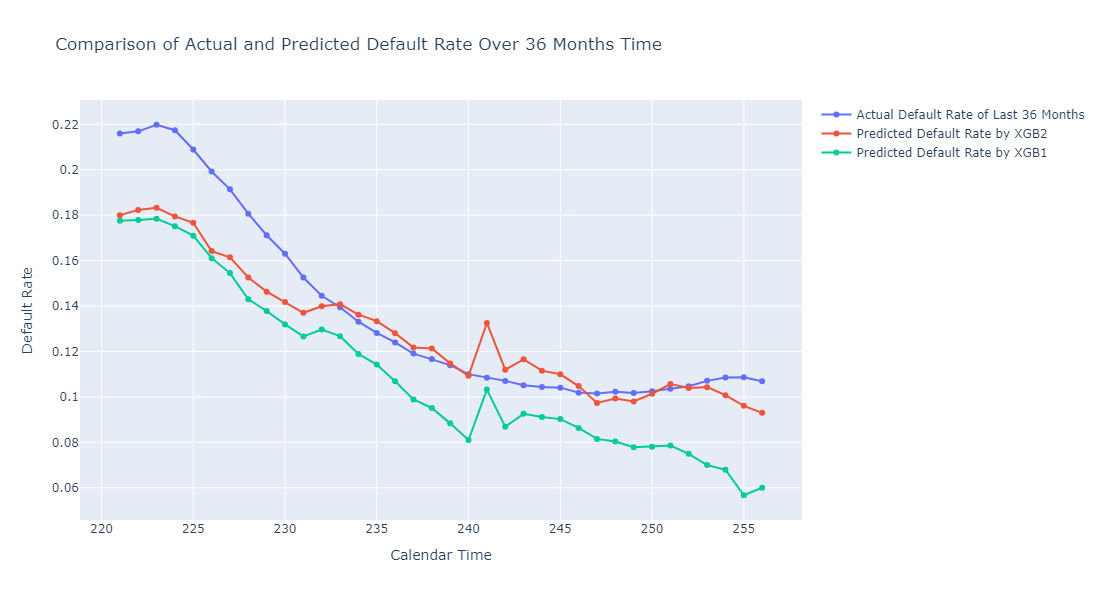

In [63]:
# Create traces
trace_actual = go.Scatter(
    x=actual_by_36.index,
    y=actual_by_36.values,
    mode='lines+markers',
    name='Actual Default Rate of Last 36 Months'
)

#trace_pred_lr = go.Scatter(x=prob_by_horizon_3.index,y=prob_by_horizon_3.values,mode='lines+markers',name='Predicted Default Rate by Logistic Regression')

trace_pred_xgb2 = go.Scatter(
    x=prob_by_xgb2_36.index,
    y=prob_by_xgb2_36.values,
    mode='lines+markers',
    name='Predicted Default Rate by XGB2'
)

trace_pred_xgb1 = go.Scatter(
    x=prob_by_xgb1_36.index,
    y=prob_by_xgb1_36.values,
    mode='lines+markers',
    name='Predicted Default Rate by XGB1'
)

# Create layout
layout = go.Layout(
    title='Comparison of Actual and Predicted Default Rate Over 36 Months Time ',
    xaxis=dict(title='Calendar Time'),
    yaxis=dict(title='Default Rate'),
    hovermode='closest',
    width=800,  # Set the width of the plot
    height=600   # Set the height of the plot
)

# Create figure
fig = go.Figure(data=[trace_actual, trace_pred_xgb2, trace_pred_xgb1], layout=layout)

# Show plot
fig.show()

In [64]:
test2_12 = oot_12.drop(['DEFAULT'],axis=1)
probabilities_xgb2_12 = calibrated_model_xgb2.predict_proba(test2_12)[:, 1]  # Get probabilities of the positive class
test2_12['predicted_probability_xgb2_12'] = probabilities_xgb2_12 
# Group by horizon and calculate mean probabilities
prob_by_xgb2_12 = test2_12.groupby('Calendar Time')['predicted_probability_xgb2_12'].mean().sort_index()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

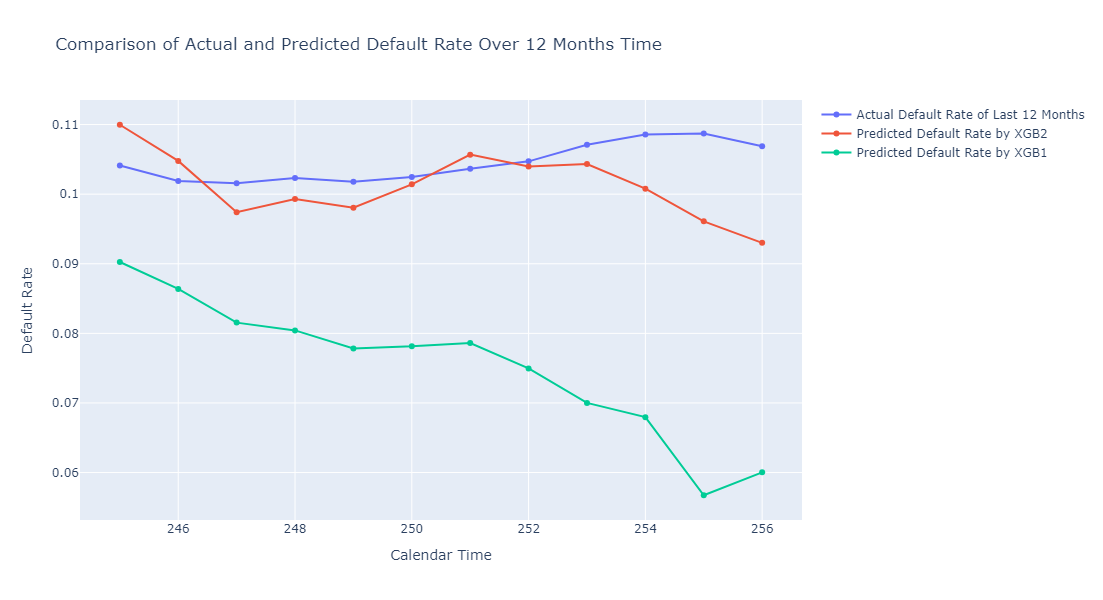

In [65]:
# Create traces
trace_actual = go.Scatter(
    x=actual_by_12.index,
    y=actual_by_12.values,
    mode='lines+markers',
    name='Actual Default Rate of Last 12 Months'
)

#trace_pred_lr = go.Scatter(x=prob_by_horizon_3.index,y=prob_by_horizon_3.values,mode='lines+markers',name='Predicted Default Rate by Logistic Regression')

trace_pred_xgb2 = go.Scatter(
    x=prob_by_xgb2_12.index,
    y=prob_by_xgb2_12.values,
    mode='lines+markers',
    name='Predicted Default Rate by XGB2'
)

trace_pred_xgb1 = go.Scatter(
    x=prob_by_xgb1_12.index,
    y=prob_by_xgb1_12.values,
    mode='lines+markers',
    name='Predicted Default Rate by XGB1'
)

# Create layout
layout = go.Layout(
    title='Comparison of Actual and Predicted Default Rate Over 12 Months Time ',
    xaxis=dict(title='Calendar Time'),
    yaxis=dict(title='Default Rate'),
    hovermode='closest',
    width=800,  # Set the width of the plot
    height=600   # Set the height of the plot
)

# Create figure
fig = go.Figure(data=[trace_actual, trace_pred_xgb2, trace_pred_xgb1], layout=layout)

# Show plot
fig.show()

In [66]:
#test_data1 = df.loc[split_index + 1:end_test_idx]
#test_data2 = df.drop(['Weight','DEFAULT'], axis=1)
#test_data1.drop(columns=['Weight','DEFAULT'], inplace=True)
test_df = dfc.drop(['DEFAULT'],axis=1)
probabilities_xgb2 = calibrated_model_xgb2.predict_proba(test_df)[:, 1]

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [67]:
test_df['predicted_probability_xgb2'] = probabilities_xgb2 
# Group by horizon and calculate mean probabilities
#prob_by_xgb2_horizon = test_data2.groupby('Horizon')['predicted_probability_xgb2'].mean().sort_index()
prob_by_xgb2_cal = test_df.groupby('Calendar Time')['predicted_probability_xgb2'].mean().sort_index()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [68]:
#exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [69]:
test_df_xgb1 = dfc.drop(['DEFAULT'],axis=1)
probabilities_xgb1_cal = calibrated_model_xgb1.predict_proba(test_df_xgb1)[:, 1]
test_df_xgb1['predicted_probability_xgb1_cal'] = probabilities_xgb1_cal
prob_by_xgb1_cal = test_df_xgb1.groupby('Calendar Time')['predicted_probability_xgb1_cal'].mean().sort_index()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [70]:
test_df_xgb1_p = dfc.drop(['DEFAULT'],axis=1)
probabilities_xgb1_cal_p = calibrated_model_xgb1_prefit.predict_proba(test_df_xgb1_p)[:, 1]
test_df_xgb1_p['predicted_probability_xgb1_cal_p'] = probabilities_xgb1_cal_p
prob_by_xgb1_cal_p = test_df_xgb1_p.groupby('Calendar Time')['predicted_probability_xgb1_cal_p'].mean().sort_index()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

NameError: name 'calibrated_model_xgb1_prefit' is not defined

In [103]:
test_df_xgb2_p = dfc.drop(['DEFAULT'],axis=1)
probabilities_xgb2_cal_p = calibrated_model_xgb2_prefit.predict_proba(test_df_xgb2_p)[:, 1]
test_df_xgb2_p['predicted_probability_xgb2_cal_p'] = probabilities_xgb2_cal_p
prob_by_xgb2_cal_p = test_df_xgb2_p.groupby('Calendar Time')['predicted_probability_xgb2_cal_p'].mean().sort_index()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [87]:
#test_df_gami = dfc.drop(['DEFAULT'],axis=1)
#probabilities_gami_cal = calibrated_model_g.predict_proba(test_df_gami)[:, 1]
#test_df_gami['predicted_probability_gami_cal'] = probabilities_gami_cal
#prob_by_gami_cal = test_df_gami.groupby('Calendar Time')['predicted_probability_gami_cal'].mean().sort_index()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

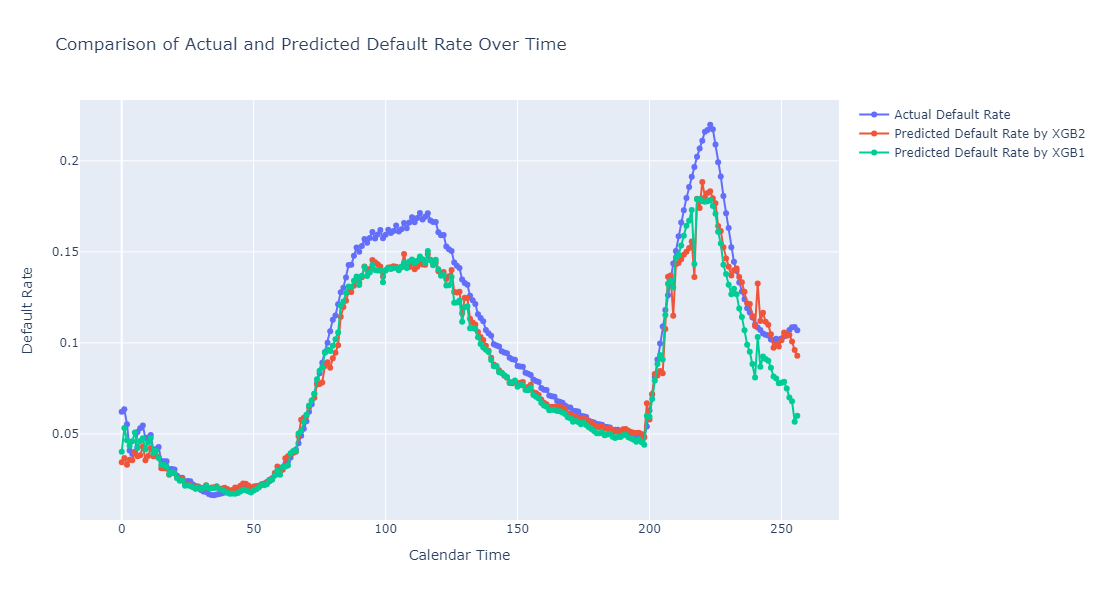

In [71]:
# Create traces
trace_actual = go.Scatter(
    x=actual_by_cal.index,
    y=actual_by_cal.values,
    mode='lines+markers',
    name='Actual Default Rate'
)

#trace_pred_lr = go.Scatter(x=prob_by_horizon_3.index,y=prob_by_horizon_3.values,mode='lines+markers',name='Predicted Default Rate by Logistic Regression')

trace_pred_xgb2 = go.Scatter(
    x=prob_by_xgb2_cal.index,
    y=prob_by_xgb2_cal.values,
    mode='lines+markers',
    name='Predicted Default Rate by XGB2'
)

trace_pred_xgb1 = go.Scatter(
    x=prob_by_xgb1_cal.index,
    y=prob_by_xgb1_cal.values,
    mode='lines+markers',
    name='Predicted Default Rate by XGB1'
)



# Create layout
layout = go.Layout(
    title='Comparison of Actual and Predicted Default Rate Over Time ',
    xaxis=dict(title='Calendar Time'),
    yaxis=dict(title='Default Rate'),
    hovermode='closest',
    width=800,  # Set the width of the plot
    height=600   # Set the height of the plot
)

# Create figure
fig = go.Figure(data=[trace_actual, trace_pred_xgb2, trace_pred_xgb1], layout=layout)

# Show plot
fig.show()